# Loading libraries

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, classification_report
import warnings
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve
import re
warnings.filterwarnings('ignore')

# Loading data

In [18]:
# === Load preselected SNP data === #
data_snp = pd.read_csv("C:/Users/bciez/Documents/Basilio/Columbia_University/MLdosage/CAR/SNP_coding_chr1_chr22.EUR_additive.csv")  # Replace with your full merged dataset if needed
print(data_snp.shape)
data_snp.head()


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/bciez/Documents/Basilio/Columbia_University/MLdosage/CAR/SNP_coding_chr1_chr22.EUR_additive.csv'

In [ ]:
# === Load preselected SNP data === #
data_pheno = pd.read_csv("C:/Users/bciez/Documents/Basilio/Columbia_University/MLdosage/CAR/CUCH_pheno_may2023_FINAL_forbasilio_30perc_NoPr_cleanFromNA.txt",sep="\t")  # Replace with your full merged dataset if needed
print(data_pheno.shape)
data_pheno.head()

(2609, 11)


,FID,IID,AGE,SEX,APOEe4,ORDER,PC1,PC2,PC3,PC4,ADRD_FINAL
0,431,431_99,75.0,1.0,1.0,1.0,-0.0208,-0.0008,-0.0049,-0.0056,1.0
1,164,164_99,79.0,0.0,2.0,7.0,0.0054,-0.0061,-0.0024,0.0044,1.0
2,166,166_99,87.0,1.0,1.0,8.0,0.0124,-0.0086,0.0169,0.0019,1.0
3,W08775,W08775,77.0,1.0,0.0,9.0,0.0072,-0.0106,-0.0116,0.0000,1.0
4,176,176_3,88.0,1.0,0.0,13.0,0.0072,-0.0067,0.0136,-0.0095,1.0


In [ ]:
data = pd.concat([data_pheno, data_snp], axis=1)
data

,FID,IID,AGE,SEX,APOEe4,ORDER,PC1,PC2,PC3,PC4,...,chr22:40919590:C:T_T,chr22:40940654:A:G_G,chr22:40958883:G:C_C,chr22:40976692:T:C_C,chr22:43364537:T:C_C,chr22:43458354:C:T_T,chr22:44791836:A:C_C,chr22:45688515:C:T_T,chr22:47388649:G:A_A,chr22:47427550:C:T_T
0,431,431_99,75.0,1.0,1.0,1.0,-0.0208,-0.0008,-0.0049,-0.0056,...,0,0,0,1,0,0,0,0,0,1
1,164,164_99,79.0,0.0,2.0,7.0,0.0054,-0.0061,-0.0024,0.0044,...,1,1,1,1,0,0,0,0,0,0
2,166,166_99,87.0,1.0,1.0,8.0,0.0124,-0.0086,0.0169,0.0019,...,1,1,1,1,0,0,0,0,0,0
3,W08775,W08775,77.0,1.0,0.0,9.0,0.0072,-0.0106,-0.0116,0.0000,...,1,1,1,1,0,0,0,0,0,0
4,176,176_3,88.0,1.0,0.0,13.0,0.0072,-0.0067,0.0136,-0.0095,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2604,0,W61267,69.0,0.0,0.0,14344.0,-0.0025,0.0026,-0.0018,0.0049,...,1,1,1,1,0,0,0,0,0,0
2605,0,X20116,68.0,0.0,0.0,14359.0,-0.0125,0.0021,-0.0013,0.0019,...,0,0,0,1,0,0,0,0,0,0
2606,0,X20010,69.0,1.0,0.0,14371.0,-0.0008,0.0061,-0.0014,0.0048,...,0,0,0,0,1,0,0,0,0,0
2607,0,X20059,70.0,0.0,0.0,14375.0,-0.0001,0.0040,-0.0018,0.0104,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
# === Define features and target === #
data.rename(columns={'ADRD_FINAL': 'ADRD'}, inplace=True)
data.rename(columns={'APOEe4': 'APOE4'}, inplace=True)
X = data.drop(columns=["FID","IID","AGE","SEX","APOE4","ORDER","ADRD","PC1","PC2","PC3","PC4"])  # Replace 'ADRD_FINAL' with your phenotype column
y = data["ADRD"]


In [ ]:
X.head()

,chr1:1027869:C:T_C,chr1:1080437:G:A_G,chr1:1081961:G:T_G,chr1:1083795:C:G_C,chr1:1085026:T:C_T,chr1:6914701:T:C_C,chr1:7408763:G:A_A,chr1:11047065:C:T_T,chr1:20013249:C:T_C,chr1:20013662:C:G_C,...,chr22:40919590:C:T_T,chr22:40940654:A:G_G,chr22:40958883:G:C_C,chr22:40976692:T:C_C,chr22:43364537:T:C_C,chr22:43458354:C:T_T,chr22:44791836:A:C_C,chr22:45688515:C:T_T,chr22:47388649:G:A_A,chr22:47427550:C:T_T
0,1,1,0,0,0,0,0,0,1,1,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,0,0,0,0,0,0
2,0,1,1,1,1,0,0,0,1,1,...,1,1,1,1,0,0,0,0,0,0
3,1,1,1,1,1,0,0,0,1,1,...,1,1,1,1,0,0,0,0,0,0
4,0,1,1,1,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: ADRD, dtype: float64

# Split data

In [19]:
# Check for NaNs or infinite values
print("NaNs in X:", X.isnull().sum().sum())
print("NaNs in y:", y.isnull().sum())
print("Infinite values in X:", np.isinf(X).sum().sum())

# Option 1: Drop rows with any NaNs in X or y
#data_clean = data.dropna()
#X = data_clean.drop(columns=["IID", "ADRD"])
#y = data_clean["ADRD"]
#data = data_clean.copy()


# Option 2 (alternative): Fill NaNs (optional)
# X = X.fillna(0)

# Check again
print("After cleaning - NaNs in X:", X.isnull().sum().sum())
print("After cleaning - NaNs in y:", y.isnull().sum())


NaNs in X: 0
NaNs in y: 0
Infinite values in X: 0
After cleaning - NaNs in X: 0
After cleaning - NaNs in y: 0


In [20]:
#data_clean = data.dropna()
#data = data_clean.copy()
# Sanitize column names
X.columns = [re.sub(r'[^\w]', '_', col) for col in X.columns]

In [21]:
# === Split data === #
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.30, random_state=42)


In [22]:
X_train

,chr1_1027869_C_T_C,chr1_1080437_G_A_G,chr1_1081961_G_T_G,chr1_1083795_C_G_C,chr1_1085026_T_C_T,chr1_6914701_T_C_C,chr1_7408763_G_A_A,chr1_11047065_C_T_T,chr1_20013249_C_T_C,chr1_20013662_C_G_C,...,chr22_40919590_C_T_T,chr22_40940654_A_G_G,chr22_40958883_G_C_C,chr22_40976692_T_C_C,chr22_43364537_T_C_C,chr22_43458354_C_T_T,chr22_44791836_A_C_C,chr22_45688515_C_T_T,chr22_47388649_G_A_A,chr22_47427550_C_T_T
1100,1,1,0,1,1,0,0,0,0,0,...,1,1,1,1,0,0,0,0,0,0
1200,0,1,1,1,1,0,0,0,1,1,...,1,1,1,1,0,0,0,0,0,0
2564,1,1,1,1,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2134,0,0,0,0,0,0,0,0,1,1,...,1,1,1,1,0,0,0,0,0,0
269,1,1,0,0,0,1,0,0,1,1,...,1,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2247,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2035,1,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2225,0,1,1,1,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2239,0,1,1,1,1,0,0,0,1,1,...,1,1,1,1,0,0,0,0,0,0


# Logistic Regression Models

In [23]:
# === Logistic Regression Models === #
models = {
    "Logistic_Lasso": LogisticRegression(penalty='l1', solver='saga', max_iter=1000),
    "Logistic_Ridge": LogisticRegression(penalty='l2', solver='saga', max_iter=1000),
    "Logistic_ElasticNet": LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=1000),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0),
    "NeuralNetwork": MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300)
}

# Fitting

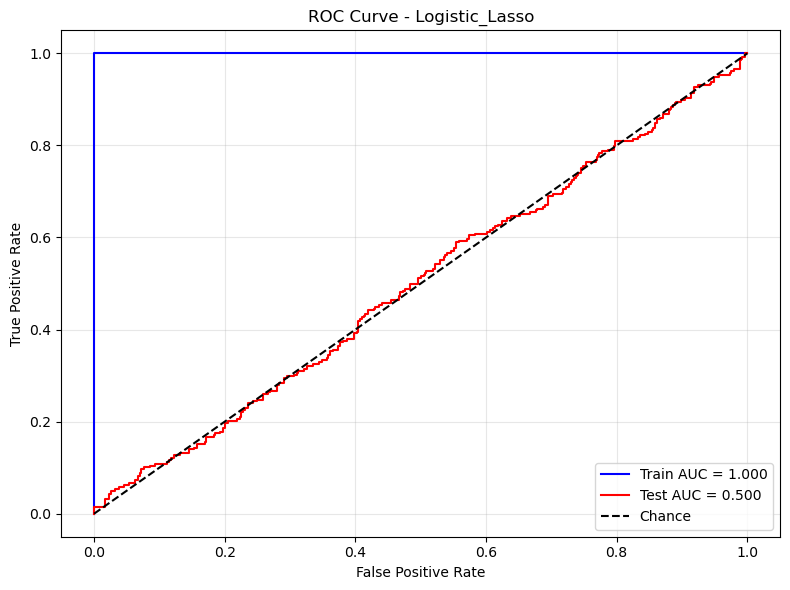

Logistic_Lasso - Train AUC: 1.0000 | Test AUC: 0.4999


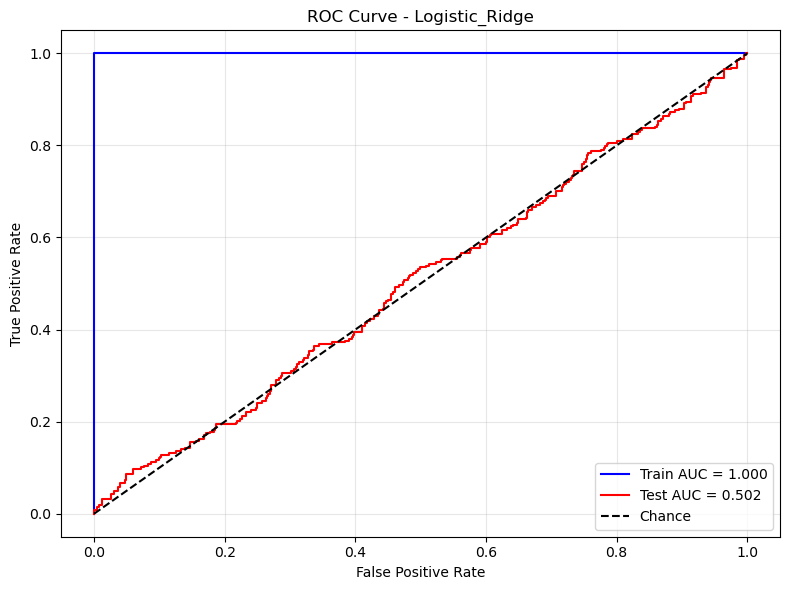

Logistic_Ridge - Train AUC: 1.0000 | Test AUC: 0.5025


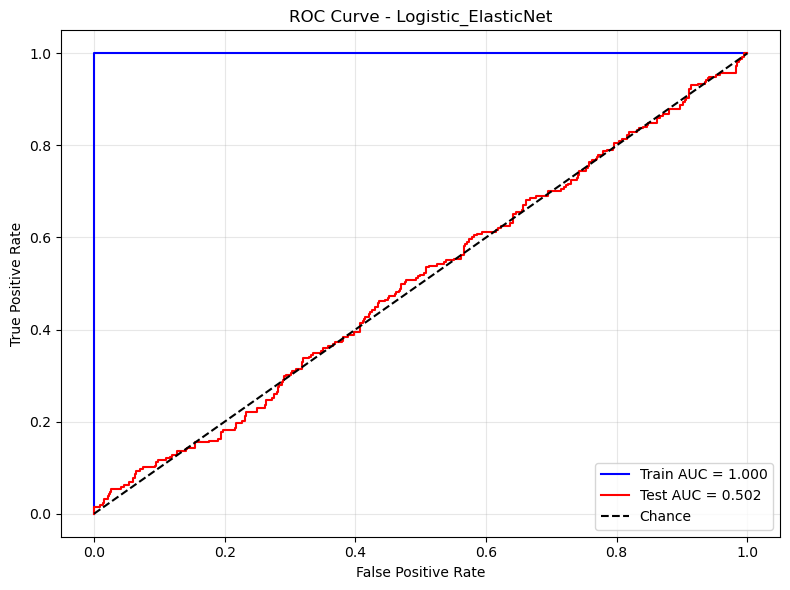

Logistic_ElasticNet - Train AUC: 1.0000 | Test AUC: 0.5020


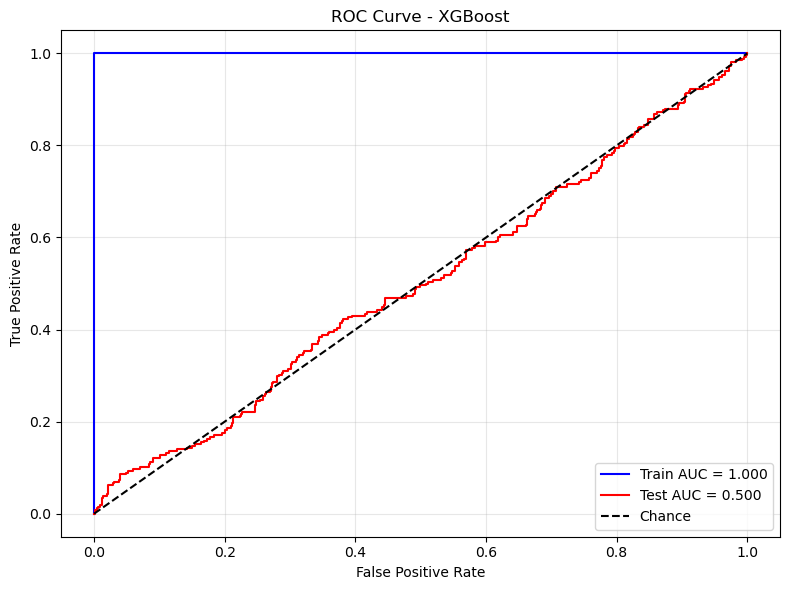

XGBoost - Train AUC: 1.0000 | Test AUC: 0.5005
[LightGBM] [Info] Number of positive: 602, number of negative: 1224
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 13.533794 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 32346
[LightGBM] [Info] Number of data points in the train set: 1826, number of used features: 16173
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.329682 -> initscore=-0.709622
[LightGBM] [Info] Start training from score -0.709622


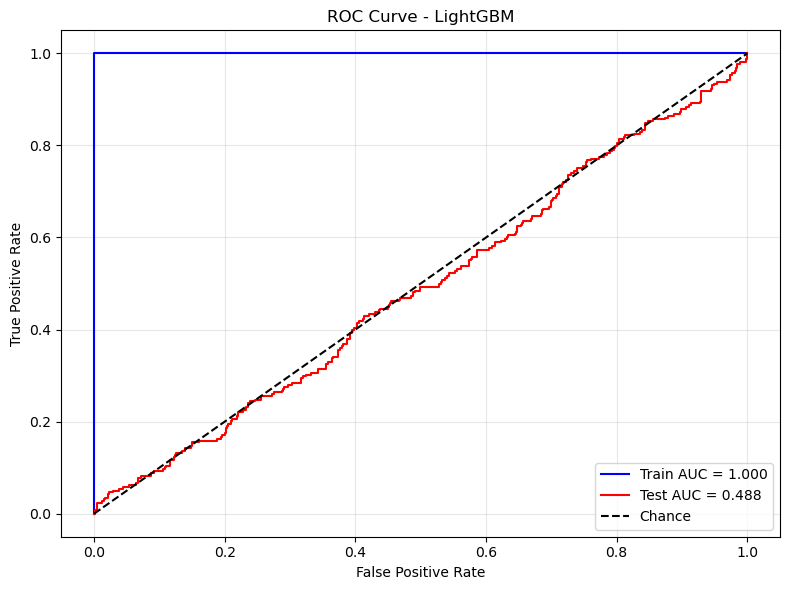

LightGBM - Train AUC: 1.0000 | Test AUC: 0.4884


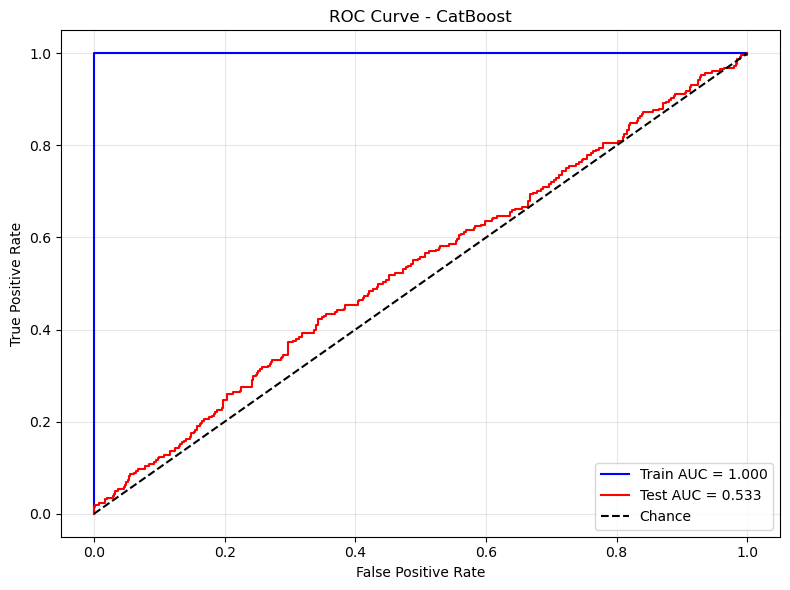

CatBoost - Train AUC: 1.0000 | Test AUC: 0.5328


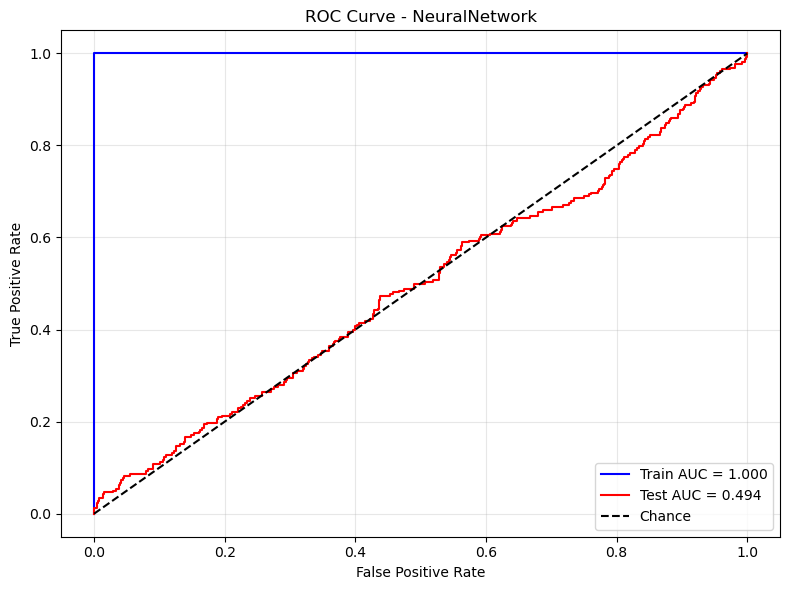

NeuralNetwork - Train AUC: 1.0000 | Test AUC: 0.4939


In [24]:
import matplotlib.pyplot as plt

# === Train, evaluate, and plot ROC curves === #
for name, model in models.items():
    model.fit(X_train, y_train)

    # Predict probabilities
    y_train_pred = model.predict_proba(X_train)[:, 1]
    y_test_pred = model.predict_proba(X_test)[:, 1]

    # AUC scores
    auc_train = roc_auc_score(y_train, y_train_pred)
    auc_test = roc_auc_score(y_test, y_test_pred)

    # ROC curves
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_train, tpr_train, label=f"Train AUC = {auc_train:.3f}", color='blue')
    plt.plot(fpr_test, tpr_test, label=f"Test AUC = {auc_test:.3f}", color='red')
    plt.plot([0, 1], [0, 1], "k--", label="Chance")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {name}")
    plt.legend(loc="lower right")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig(f"ROC_{name}_EUR_sumstat_dominant.png")
    plt.show()

    print(f"{name} - Train AUC: {auc_train:.4f} | Test AUC: {auc_test:.4f}")

# Evaluation of feature importance

In [25]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# === Cross-validation setup === #
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# === Evaluate models === #
for name, model in models.items():
    print(f"\nEvaluating {name}...")
    
    # Cross-validated ROC-AUC
    auc_scores = cross_val_score(model, X, y, cv=cv, scoring='roc_auc', n_jobs=-1)
    print(f"Mean ROC-AUC: {auc_scores.mean():.4f} ± {auc_scores.std():.4f}")
    
    # Fit the model on the full dataset to get feature importance
    model.fit(X, y)
    
    # Permutation Feature Importance (PFI)
    result = permutation_importance(model, X, y, scoring='roc_auc', n_repeats=10, random_state=42, n_jobs=-1)
    importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': result.importances_mean
    }).sort_values(by='Importance', ascending=False)
    
    # Save feature importance
    importance_df.to_csv(f"PFI_{name}.csv", index=False)
    
    # Plot top 20 features
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'][:20][::-1], importance_df['Importance'][:20][::-1])
    plt.xlabel('Mean Importance')
    plt.title(f'Permutation Feature Importance - {name}')
    plt.tight_layout()
    plt.savefig(f"PFI_{name}_EUR_sumstat_dominant.png")
    plt.show()


Evaluating Logistic_Lasso...


Mean ROC-AUC: 0.5220 ± 0.0421
